In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [13]:
# set configurations for number of samples
sample_size = 500
nr_sample = 20
x_b = np.linspace(0,1,20)
x_h = np.linspace(0,20,20)

### Bounded distributions

In [6]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [7]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.0,0.162,0.224,0.262,0.316,0.352,0.384,0.414,0.448,0.476,...,0.548,0.596,0.642,0.676,0.702,0.734,0.794,0.876,1.0,arcsine
1,0.0,0.152,0.218,0.284,0.332,0.378,0.412,0.450,0.482,0.510,...,0.558,0.580,0.612,0.652,0.684,0.738,0.782,0.856,1.0,arcsine
2,0.0,0.136,0.202,0.268,0.316,0.350,0.388,0.424,0.452,0.486,...,0.540,0.572,0.606,0.650,0.686,0.728,0.770,0.842,1.0,arcsine


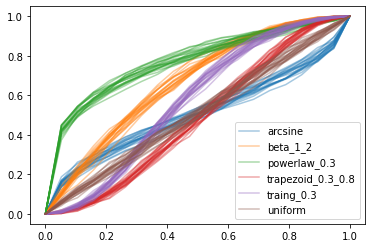

In [8]:
dem.get_edf_plot_2(edf_df, x_b)

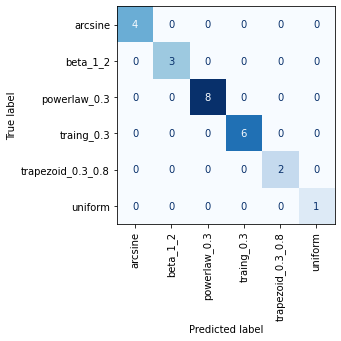

array([1., 1., 1., 1., 1.])

In [9]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv, plot=1)

In [17]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,1,i)
    edf_df = dem.get_edf(bounded_samples, x)
    score = cm.svm_model(edf_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

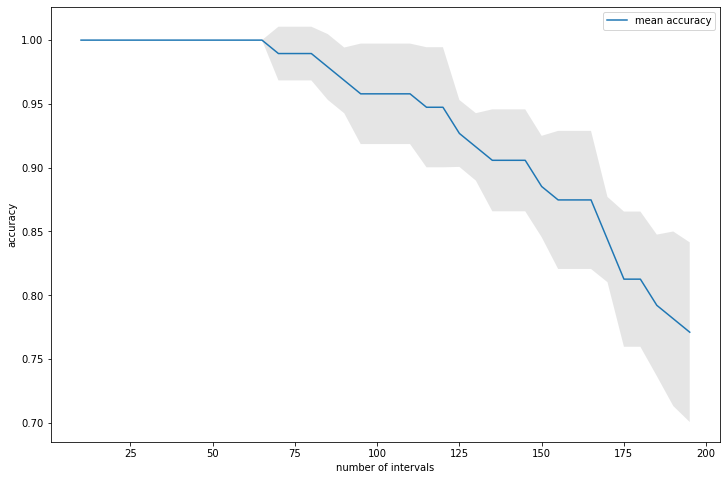

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

### Heavytail distributions

In [11]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [14]:
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.0,0.512,0.720,0.816,0.876,0.900,0.92,0.938,0.944,0.954,...,0.964,0.964,0.968,0.968,0.968,0.968,0.972,0.976,0.978,cauchy
1,0.0,0.538,0.714,0.798,0.854,0.870,0.89,0.906,0.920,0.926,...,0.936,0.946,0.950,0.950,0.954,0.958,0.958,0.960,0.964,cauchy
2,0.0,0.518,0.708,0.780,0.842,0.878,0.90,0.912,0.920,0.928,...,0.948,0.950,0.950,0.952,0.952,0.956,0.958,0.960,0.964,cauchy


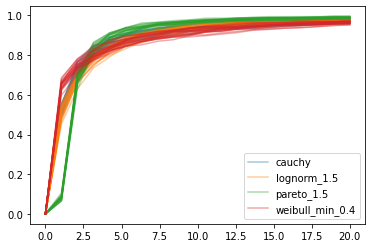

In [15]:
dem.get_edf_plot(edf_df, x_h)

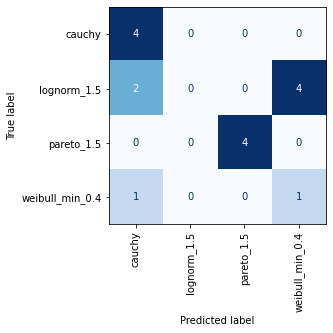

array([0.69230769, 0.76923077, 0.84615385, 0.92307692, 0.83333333])

In [16]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv, plot=1)

In [21]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,20,i)
    edf_df = dem.get_edf(heavytail_samples, x)
    score = cm.svm_model(edf_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

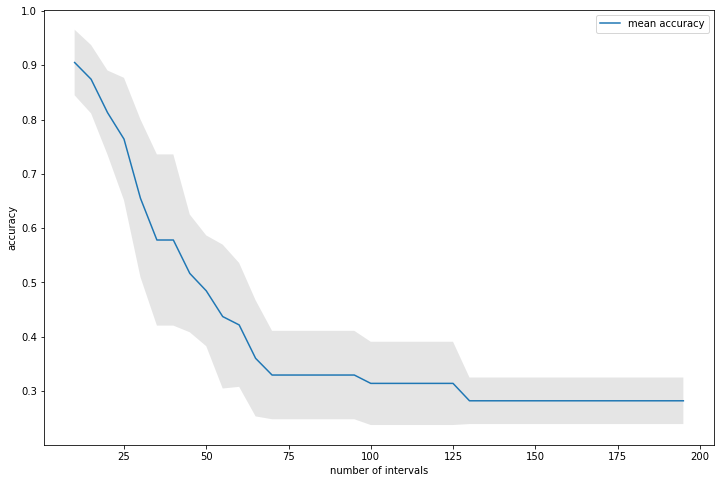

In [22]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();